In [ ]:
import pandas as pd                                      #Insights-Dataset summary:
import numpy as np                                       #Demographic and background variables (e.g., sex, age, address, famsize)
import seaborn as sns                                    #Parental education and jobs
import matplotlib.pyplot as plt                          #Academic and behavioral indicators (e.g., studytime, failures, absences)
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
mat_df = pd.read_csv('/student-mat.csv', sep=';')
por_df = pd.read_csv('/student-por.csv', sep=';')
mat_df_info = mat_df.info()
por_df_info = por_df.info()
mat_df_shape = mat_df.shape
por_df_shape = por_df.shape
mat_df_head = mat_df.head()
por_df_head = por_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# Check missing values
print(df.isnull().sum())

school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    0
dtype: int64


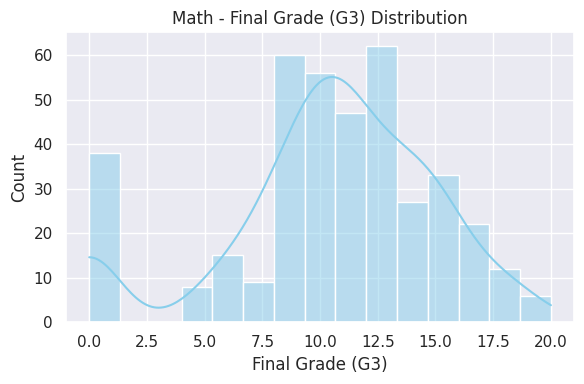

/tmp/ipython-input-32-556491887.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df, palette='Set2')


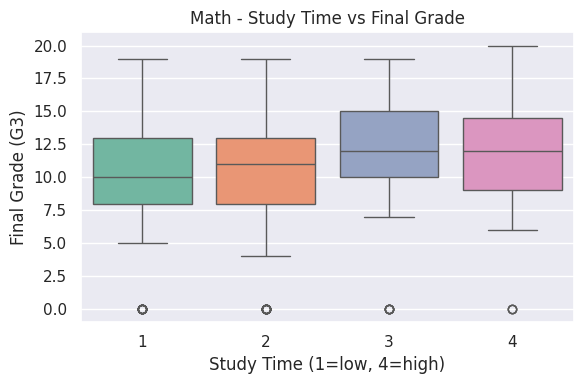

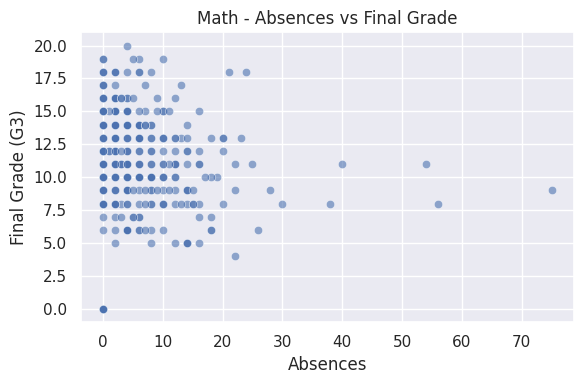

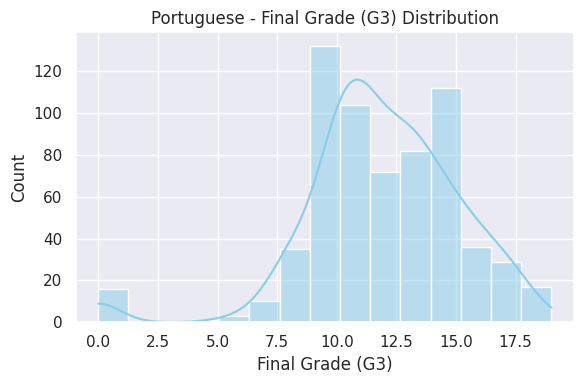

/tmp/ipython-input-32-556491887.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df, palette='Set2')


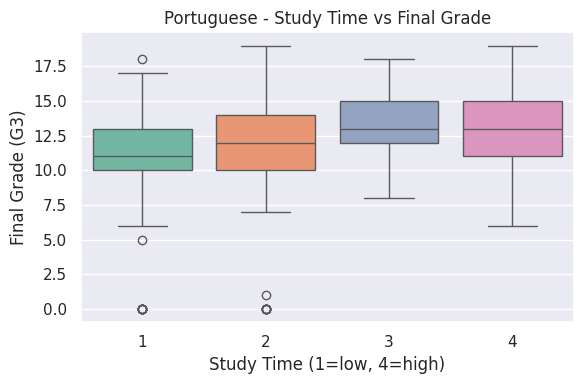

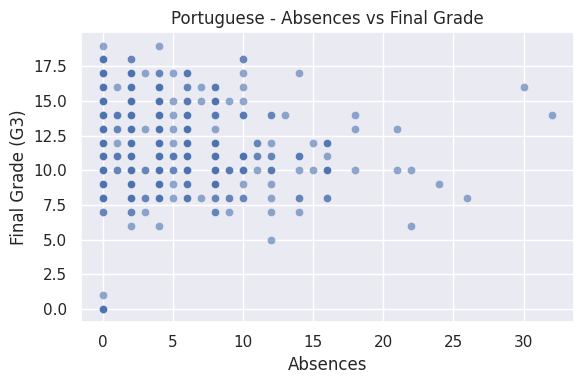

(G3           1.000000
 G2           0.904868
 G1           0.801468
 Medu         0.217147
 Fedu         0.152457
 studytime    0.097820
 famrel       0.051363
 absences     0.034247
 freetime     0.011307
 Walc        -0.051939
 Name: G3, dtype: float64,
 G3           1.000000
 G2           0.918548
 G1           0.826387
 studytime    0.249789
 Medu         0.240151
 Fedu         0.211800
 famrel       0.063361
 goout       -0.087641
 absences    -0.091379
 health      -0.098851
 Name: G3, dtype: float64)

In [ ]:
# Combine some repetitive analysis in a function
def performance_eda(df, course_name):
    summary = {}

    # Correlation matrix for numeric features
    numeric_df = df.select_dtypes(include='number')
    corr_matrix = numeric_df.corr()
    g3_corr = corr_matrix['G3'].sort_values(ascending=False)

    # Store correlations with G3
    summary['correlation_with_G3'] = g3_corr

    # Distribution of final grades
    plt.figure(figsize=(6, 4))
    sns.histplot(df['G3'], kde=True, bins=15, color='skyblue')
    plt.title(f"{course_name} - Final Grade (G3) Distribution")
    plt.xlabel("Final Grade (G3)")
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Boxplot of study time vs G3
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='studytime', y='G3', data=df, palette='Set2')
    plt.title(f"{course_name} - Study Time vs Final Grade")
    plt.xlabel("Study Time (1=low, 4=high)")
    plt.ylabel("Final Grade (G3)")
    plt.tight_layout()
    plt.show()

    # Boxplot of absences vs G3
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='absences', y='G3', data=df, alpha=0.6)
    plt.title(f"{course_name} - Absences vs Final Grade")
    plt.xlabel("Absences")
    plt.ylabel("Final Grade (G3)")
    plt.tight_layout()
    plt.show()

    return summary

# Run EDA for both datasets
mat_summary = performance_eda(mat_df, "Math")
por_summary = performance_eda(por_df, "Portuguese")

mat_summary['correlation_with_G3'].head(10), por_summary['correlation_with_G3'].head(10)